### Problem Statement:
    
    
Data Set Information:
This data set includes descriptions of hypothetical samples corresponding to 23 species of gilled mushrooms in the Agaricus and Lepiota Family (pp. 500-525). Each species is identified as definitely edible, definitely poisonous, or of unknown edibility and not recommended. This latter class was combined with the poisonous one. The Guide clearly states that there is no simple rule for determining the edibility of a mushroom; no rule like ``leaflets three, let it be'' for Poisonous Oak and Ivy.

target column : Class(Edible/Poisonous)

In [199]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
import numpy as np
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score,roc_auc_score,roc_curve
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
import joblib 

### Data Loading and EDA on dataset

In [93]:
df = pd.read_csv('mushrooms.csv')

In [3]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [38]:
df.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

##### Observation:
- There are no null values in the dataset

In [39]:
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [40]:
df.dtypes

class                       object
cap-shape                   object
cap-surface                 object
cap-color                   object
bruises                     object
odor                        object
gill-attachment             object
gill-spacing                object
gill-size                   object
gill-color                  object
stalk-shape                 object
stalk-root                  object
stalk-surface-above-ring    object
stalk-surface-below-ring    object
stalk-color-above-ring      object
stalk-color-below-ring      object
veil-type                   object
veil-color                  object
ring-number                 object
ring-type                   object
spore-print-color           object
population                  object
habitat                     object
dtype: object

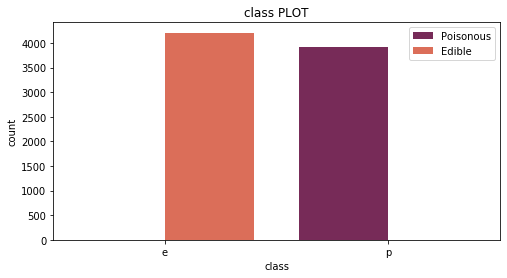

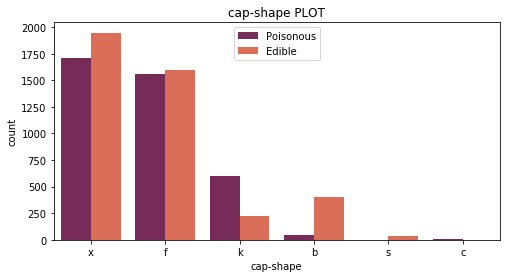

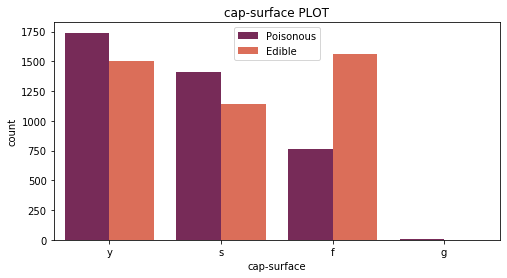

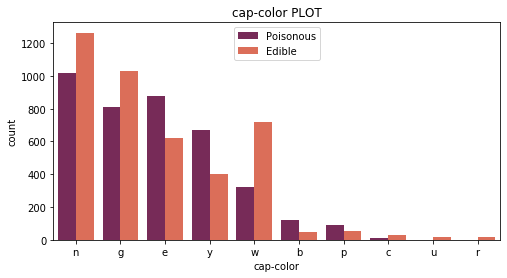

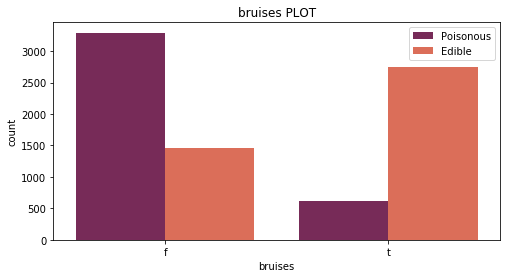

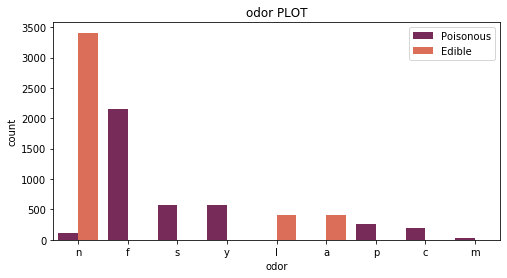

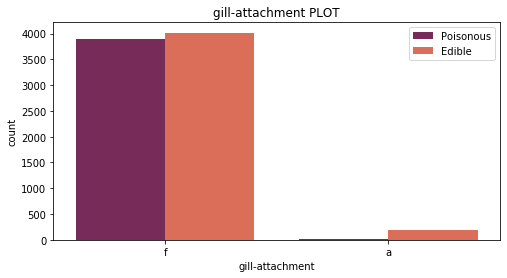

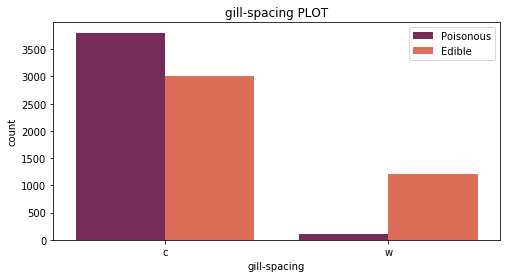

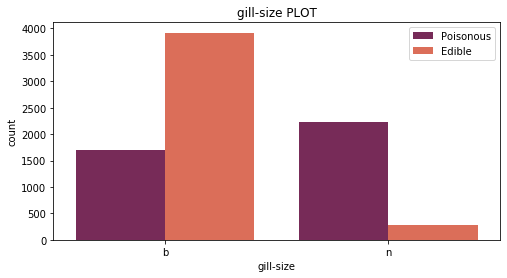

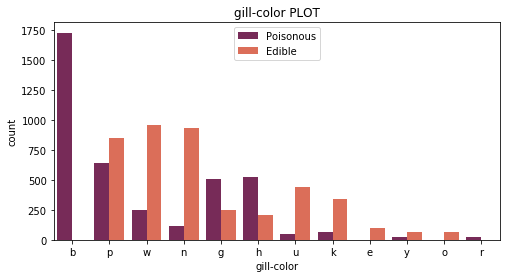

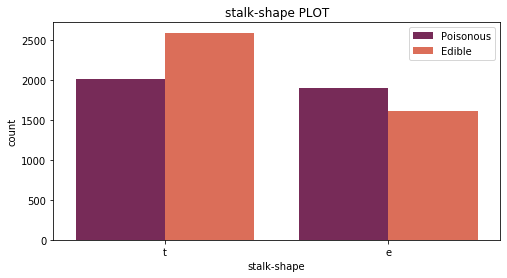

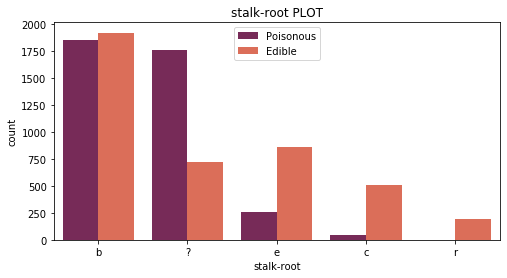

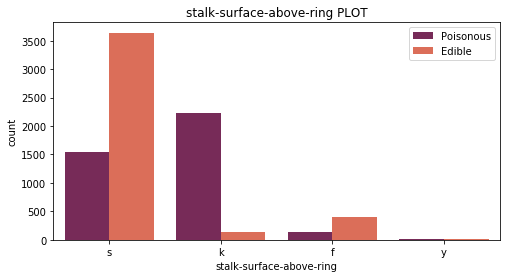

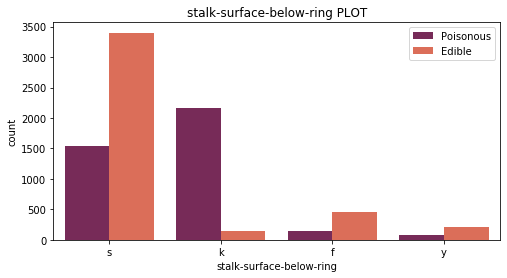

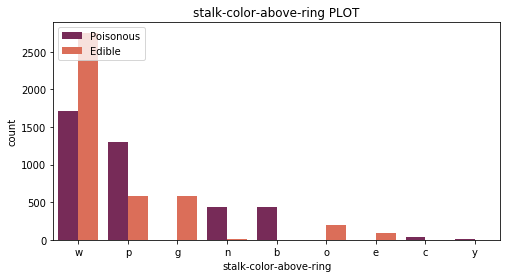

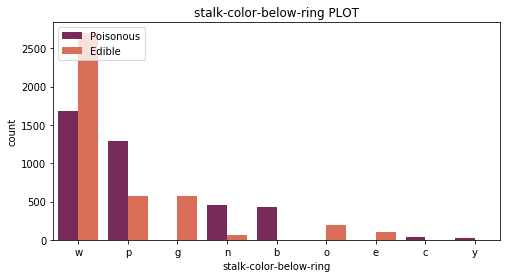

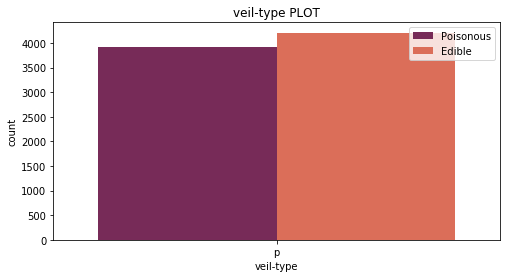

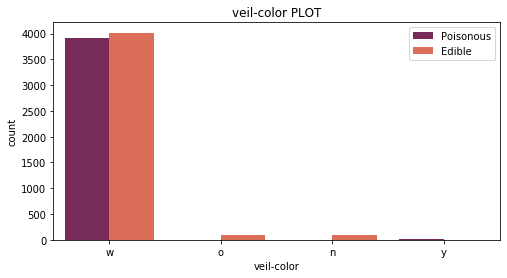

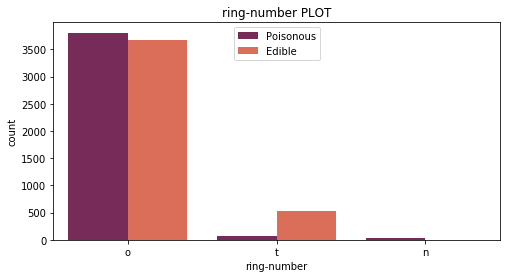

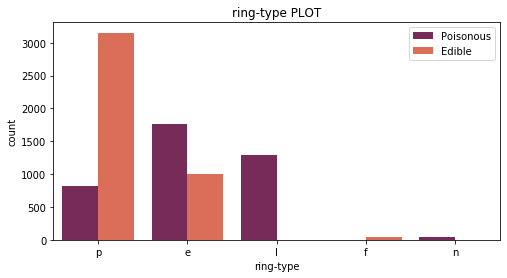

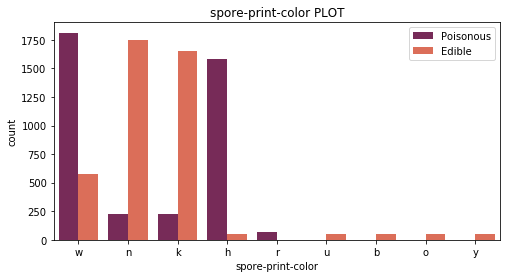

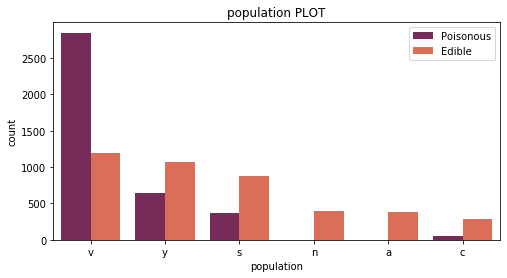

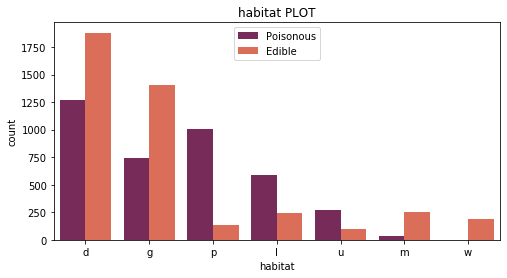

In [58]:
for i in df.columns:
    plt.figure(figsize=(8,4))
    plt.title(i+' PLOT')
    order = df[i].value_counts(ascending=False).index
    ax = sns.countplot(df[i], palette="rocket",order=order,hue=df['class'])
    ax.legend(['Poisonous','Edible'])

##### Observation:
- we can observe the target features classes are balanced


In [59]:
### as classes are almost balanced we dont need to do rebalancing
df['class'].value_counts()

e    4208
p    3916
Name: class, dtype: int64

In [60]:
df.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [76]:
## checking for columns which have unknown values

for i in df.columns:
    print(i,len(df[i][~df[i].str.isalpha()].value_counts()))
       






class 0
cap-shape 0
cap-surface 0
cap-color 0
bruises 0
odor 0
gill-attachment 0
gill-spacing 0
gill-size 0
gill-color 0
stalk-shape 0
stalk-root 1
stalk-surface-above-ring 0
stalk-surface-below-ring 0
stalk-color-above-ring 0
stalk-color-below-ring 0
veil-type 0
veil-color 0
ring-number 0
ring-type 0
spore-print-color 0
population 0
habitat 0


In [77]:
df['stalk-root'].value_counts()

b    3776
?    2480
e    1120
c     556
r     192
Name: stalk-root, dtype: int64

In [95]:
df.drop(df[df['stalk-root'] == '?'].index, inplace = True)

##### Observation:
- Dropping records in dataset where stalk-root is '?'

### Data Preparation

In [99]:
df = df.astype('category')

In [157]:
df.drop(columns =['class'],inplace=True)

In [159]:
## label encoding the columns

labelencoder=LabelEncoder()
for column in df.columns:
    df[column] = labelencoder.fit_transform(df[column])

##### Observation:
- Encoding the categorical features as numerical features

In [160]:
df.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,5,2,4,1,6,1,0,1,2,0,...,2,2,5,5,0,1,3,1,3,5
1,5,2,7,1,0,1,0,0,2,0,...,2,2,5,5,0,1,3,2,2,1
2,0,2,6,1,3,1,0,0,3,0,...,2,2,5,5,0,1,3,2,2,3
3,5,3,6,1,6,1,0,1,3,0,...,2,2,5,5,0,1,3,1,3,5
4,5,2,3,0,5,1,1,0,2,1,...,2,2,5,5,0,1,0,2,0,1


In [162]:
## we will drop veil-type as it only has one value

df['veil-type'].value_counts()
df.drop(columns= ['veil-type'],inplace=True)

##### Observation:
- veil-type feature droppes as it had only one value in it.

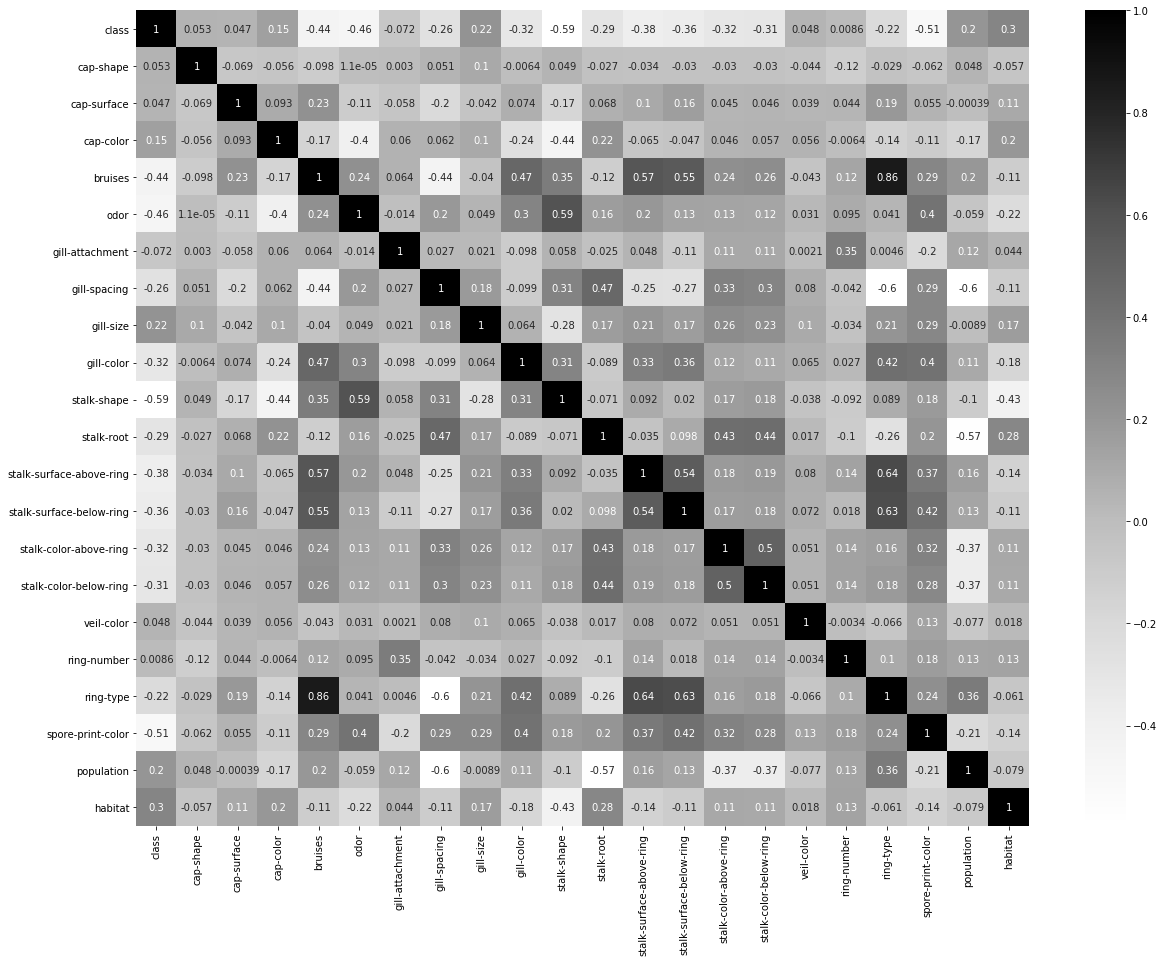

In [112]:
## now will check for correlation matrix


plt.rcParams['figure.figsize'] = (20, 15)
corr = df.corr()

sns.heatmap(corr,cmap='Greys' ,annot=True)

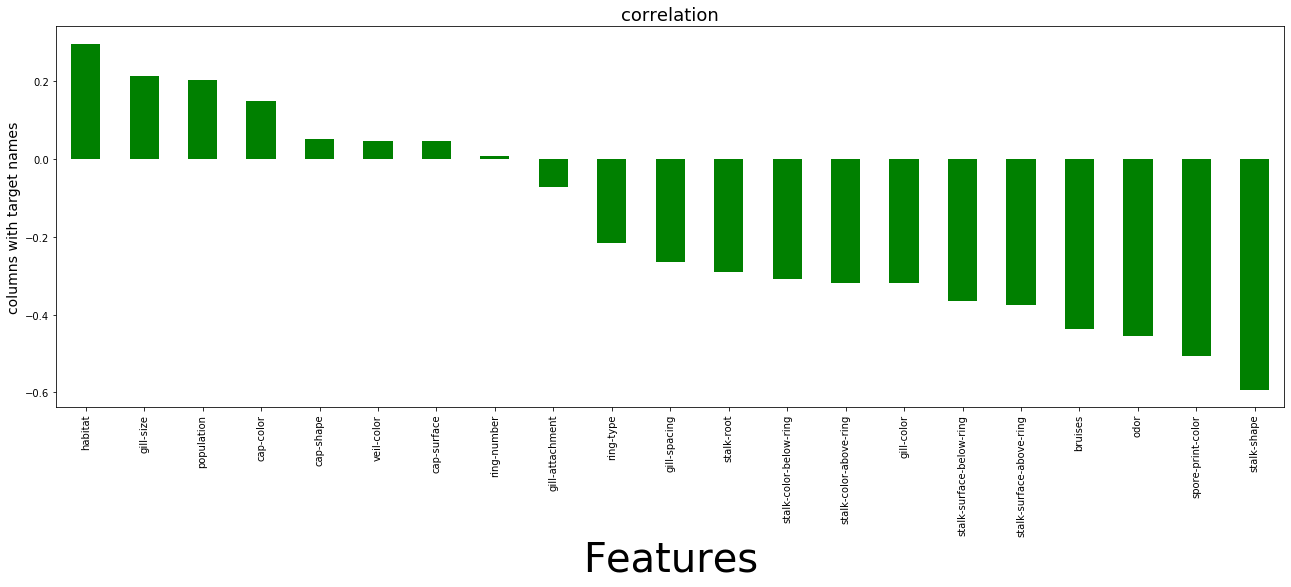

In [140]:
plt.figure(figsize=(22,7))
df.corr()['class'].sort_values(ascending=False).drop(['class']).plot(kind='bar',color='g')
plt.xlabel('Features',fontsize=40)
plt.ylabel('columns with target names',fontsize=14)
plt.title('correlation',fontsize=18)
plt.show()

##### Observation:
- we can observe positive correlation with target class with features like habitat, gill-size, population.
- we can observe negative correlation with spore-print-color and stalk-shape

### Model Preparation

In [147]:
## compute the feature importance using decision tree

X = df.drop(['class'], axis=1)  
y = df["class"]

x_train, x_test, y_train, y_test = train_test_split(X, y, random_state=44, test_size=0.2)

In [148]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [138]:
df['spore-print-color'].value_counts()

2    1920
1    1872
0    1584
5     148
3      72
4      48
Name: spore-print-color, dtype: int64

### Feature Importance

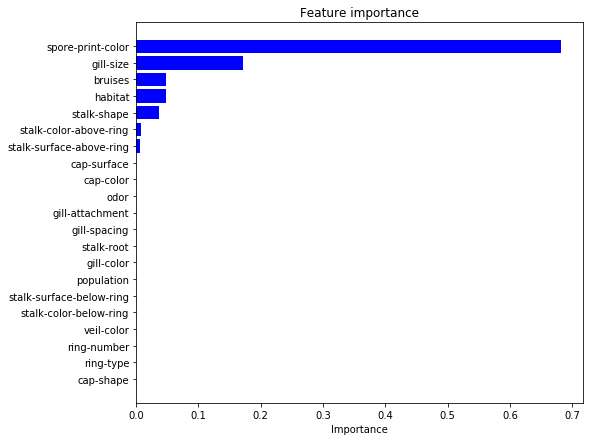

In [198]:
features_list = X.columns.values
feature_importance = dt.feature_importances_
sorted_idx = np.argsort(feature_importance)

plt.figure(figsize=(8,7))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center', color ="blue")
plt.yticks(range(len(sorted_idx)), features_list[sorted_idx])
plt.xlabel('Importance')
plt.title('Feature importance')
plt.show()


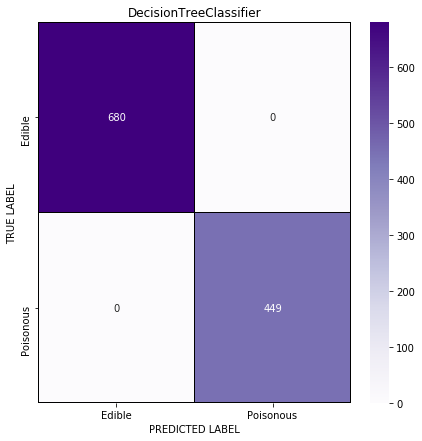

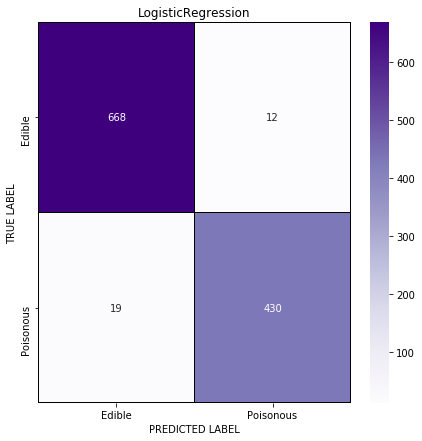

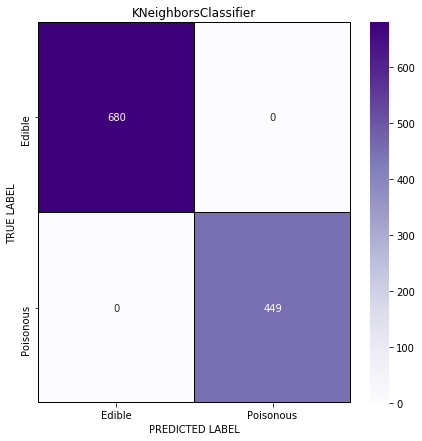

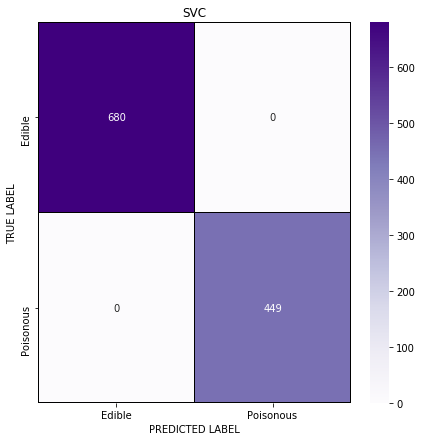

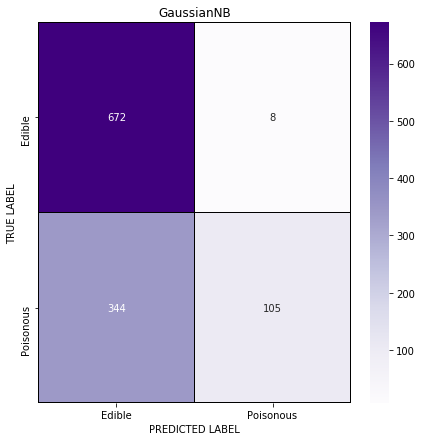

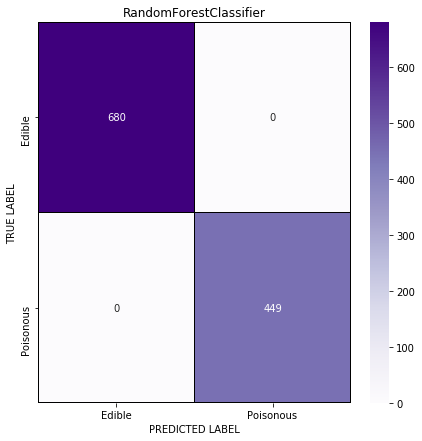

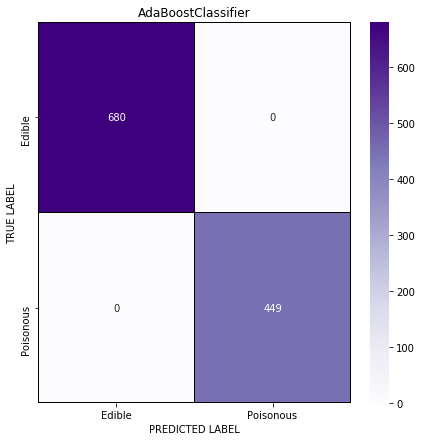

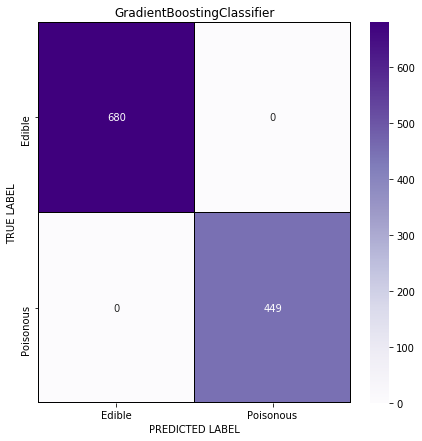

In [185]:
model_list = [
    DecisionTreeClassifier(),
    LogisticRegression(solver="lbfgs", max_iter=500),
    KNeighborsClassifier(n_neighbors=1),
    SVC(random_state=42, gamma="auto"),
    GaussianNB(),
    RandomForestClassifier(n_estimators=100, random_state=42),
    AdaBoostClassifier(n_estimators=100),
    GradientBoostingClassifier(n_estimators=100)
]

index_list = ['DT','LR','KNN','SVC','NB','RF','ADB','GBC']

def best_fit_model(models,x_train,x_test,y_train,_y_test):
    accuracy_scores = []
    cv_scores= []
    roc_auc_scores = []
   
    for m in models:
        m.fit(x_train,y_train)
        y_pred = m.predict(x_test)
        accuracy_scores.append(accuracy_score(y_test,y_pred))
        cv_scores.append(np.mean(cross_val_score(m,X,y,cv=5,scoring='accuracy')))
        roc_auc_scores.append(roc_auc_score(y_test,y_pred))
        cm = confusion_matrix(y_test, y_pred)
        x_axis_labels = ["Edible", "Poisonous"]
        y_axis_labels = ["Edible", "Poisonous"]
        f, ax = plt.subplots(figsize =(7,7))
        sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Purples", xticklabels=x_axis_labels, yticklabels=y_axis_labels)    
        plt.xlabel("PREDICTED LABEL")
        plt.ylabel("TRUE LABEL")
        plt.title(str(m).split('(')[0]);
        plt.show()
    df = pd.DataFrame(list(zip(accuracy_scores,cv_scores,roc_auc_scores)),index=index_list,columns=['Accuracy','CV_Score','ROC_AUC_SCORE'])
    df['Score_Diff'] = df['Accuracy'] - df['CV_Score']
    return df

best_df =best_fit_model(model_list,x_train,x_test,y_train,y_test)

In [171]:
best_df

,Accuracy,CV_Score,ROC_AUC_SCORE,Score_Diff
DT,1.000000,0.941884,1.000000,0.058116
LR,0.972542,0.917251,0.970018,0.055292
KNN,1.000000,0.942588,1.000000,0.057412
SVC,1.000000,0.937452,1.000000,0.062548
NB,0.688220,0.717588,0.611044,-0.029369
RF,1.000000,0.933196,1.000000,0.066804
ADB,1.000000,0.937629,1.000000,0.062371
GBC,1.000000,0.929827,1.000000,0.070173


##### Observation:
- By taking in consideration Accuracy, cv_score , Roc_auc_score and Confusion matrix we can observe that knn is the best model.

### Knearest Neighbour Hyper parameter Tuning

In [187]:
### from the table and confustion matrix we know knn has the best score

leaf_size = list(range(1,50))
n_neighbors = list(range(1,30))
p=[1,2]

hyperparameters = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p)

knn_2 = KNeighborsClassifier()

clf = GridSearchCV(knn_2, hyperparameters, cv=5)

best_model = clf.fit(x_train,y_train)


print('Best leaf_size:', best_model.best_estimator_.get_params()['leaf_size'])
print('Best p:', best_model.best_estimator_.get_params()['p'])
print('Best n_neighbors:', best_model.best_estimator_.get_params()['n_neighbors'])


Best leaf_size: 1
Best p: 1
Best n_neighbors: 1


accuracy score : 1.0
Cross val score : 0.9409938814867862
Roc_Auc_Score 1.0


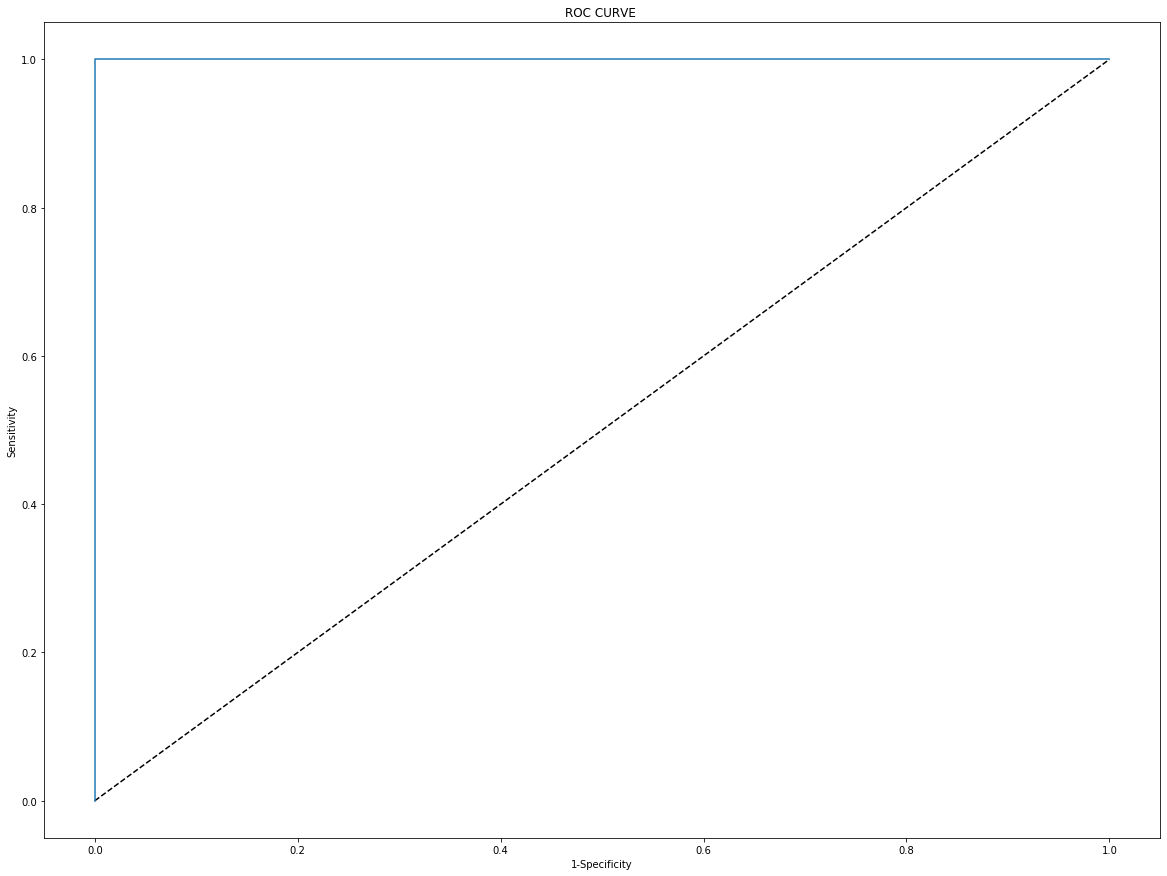

In [195]:
knn_final = KNeighborsClassifier(n_neighbors=1,p=1,leaf_size=1)
knn_final.fit(x_train,y_train)
pred = knn_final.predict(x_test)
print(f'accuracy score : {accuracy_score(y_test,pred)}')
print('Cross val score :',np.mean(cross_val_score(knn_final,X,y,cv=5,scoring='accuracy')))

knn_proba = knn_final.predict_proba(x_test)[:,1]
fpr,tpr,threshold=roc_curve(y_test,knn_proba)      
plt.plot([0,1],[0,1],'k--')
plt.xlabel('1-Specificity')
plt.ylabel('Sensitivity')
plt.plot(fpr,tpr)
plt.title('ROC CURVE ')
print('Roc_Auc_Score',roc_auc_score(y_test,pred))

In [197]:
pd.DataFrame(list(zip(y_test,pred)), columns=['True value','Knn_Predicted_value'])[:20]

,True value,Knn_Predicted_value
0,1,1
1,0,0
2,0,0
3,0,0
4,0,0
5,0,0
6,0,0
7,1,1
8,1,1
9,1,1


### Creating Pickle file

In [200]:

joblib.dump(knn_final,'mushroom_classification_knn.pk')

['mushroom_classification_knn.pk']

In [201]:
joblib.load('mushroom_classification_knn.pk')

KNeighborsClassifier(algorithm='auto', leaf_size=1, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=1,
                     weights='uniform')